# INTRODUCTION

Let's try to solve the XOR problem. The following codes were based on the ideas from Ian Goodfellow et al. _Deep Learning_ book.

## Imports and Dataset 

In [130]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
print('X = \n',X)
print('y = \n ',y)

X = 
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y = 
  [[0]
 [1]
 [1]
 [0]]


## Some Plot Stuff 

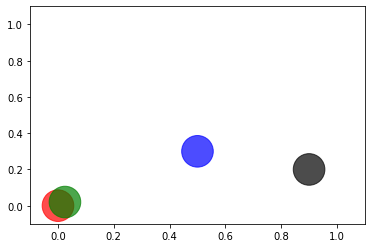

In [132]:
#s is the points size
#alpha is how transparent the objects are (as alpha -> 1, the points look more "solid")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1]) 
plt.scatter([0,0.025,0.9,0.5],[0,0.02,0.2,0.3],color = ['red','green','black','blue'],s = [1000,1000,1000,1000],alpha=0.7)

In [133]:
def my_plot(first_axis,second_axis,x_lim,y_lim,my_title,x_axis_lbl,y_axis_lbl,line_flag = False,line_m=1,line_b=0,size=10**3,alpha = 0.7):
  plt.xlim(x_lim)
  plt.ylim(y_lim)
  plt.title(my_title)
  plt.xlabel(x_axis_lbl)
  plt.ylabel(y_axis_lbl)
  plt.scatter(first_axis,second_axis,color=['red','green','black','blue'], s = [size,size,size,size],alpha=alpha)
  if(line_flag):
    x_basis = np.linspace(x_lim[0],x_lim[1],1000)
    plt.plot(x_basis,line_m*x_basis+line_b,linestyle='-')
  plt.grid()
  plt.show()

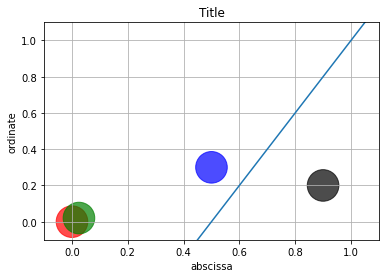

In [134]:
my_plot([0,0.025,0.9,0.5],[0,0.02,0.2,0.3],[-0.1,1.1],[-0.1,1.1],"Title","abscissa","ordinate",line_flag=True,line_m=2,line_b=-1)

## Using function composition
This was based on functions that can be found here: https://www.tensorflow.org/api_docs/python/tf/linalg


In [135]:
# Let's set plot limits
my_x_lim = [-3,3]
my_y_lim = [-3,3]

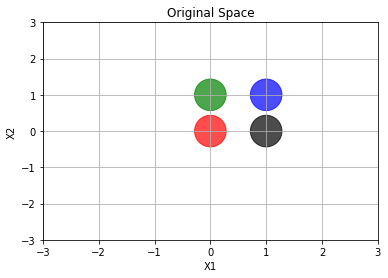

In [136]:
# Plot examples

my_plot(X[:,0],X[:,1],my_x_lim,my_y_lim,"Original Space", "X1","X2")

In [137]:
# Weight matrix (from input dimension to hidden layer representation)
W = tf.constant([1,1,1,1],shape=[2,2])
W

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [138]:
# bias vector in hidden layer representation
c = tf.constant([0,-1],shape=[2,1])
c

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 0],
       [-1]], dtype=int32)>

In [139]:
# weight vector (linear transformation from hidden layer representation to output dimension)
w = tf.constant([1,-2],shape=[2,1])
w

# we suppose output dimension's bias is zero (b = 0)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 1],
       [-2]], dtype=int32)>

In [140]:
# to multiply X by W, the X matrix must be turned into an int32 tensor 

matrix_product = tf.linalg.matmul( tf.constant(X,dtype='int32'), W)
matrix_product.numpy()

array([[0, 0],
       [1, 1],
       [1, 1],
       [2, 2]], dtype=int32)

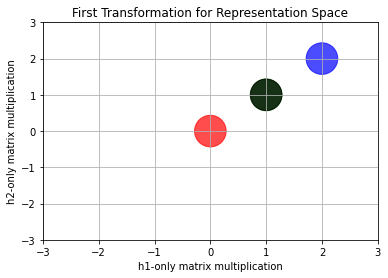

In [141]:
#plotting result
my_plot(matrix_product.numpy()[:,0],matrix_product.numpy()[:,1],
        my_x_lim,my_y_lim,"First Transformation for Representation Space","h1-only matrix multiplication", "h2-only matrix multiplication")

In [142]:
# to addition properly, transpose c and create a 4x2 matrix repeating the rows

sum = tf.math.add(tf.broadcast_to(tf.transpose(c),[4,2]),matrix_product)
sum.numpy()

array([[ 0, -1],
       [ 1,  0],
       [ 1,  0],
       [ 2,  1]], dtype=int32)

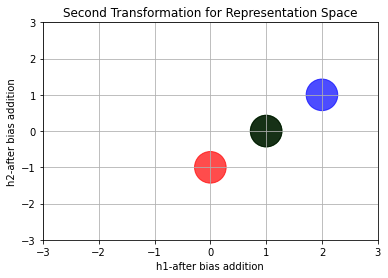

In [143]:
#plotting result
my_plot(sum.numpy()[:,0],sum.numpy()[:,1],
        my_x_lim,my_y_lim,"Second Transformation for Representation Space","h1-after bias addition","h2-after bias addition")

In [144]:
# apply the nonlinearity
max_output = tf.math.maximum(sum,0)
max_output.numpy()

array([[0, 0],
       [1, 0],
       [1, 0],
       [2, 1]], dtype=int32)

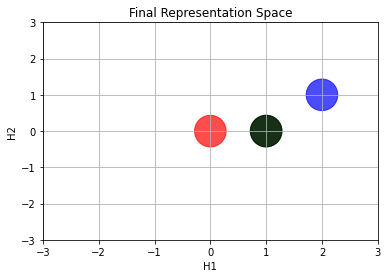

In [145]:
# plotting result
my_plot(max_output.numpy()[:,0],max_output.numpy()[:,1],
        my_x_lim,my_y_lim,"Final Representation Space","H1","H2")

In [146]:
# apply the linear transformation in output space
f = tf.linalg.matmul(max_output, w)

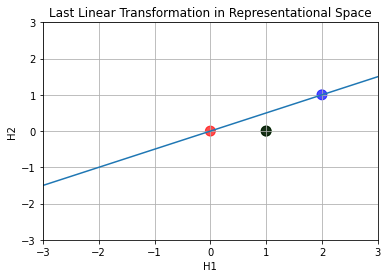

In [147]:
# what happened?

# plotting result
my_plot(max_output.numpy()[:,0],max_output.numpy()[:,1],
        my_x_lim,my_y_lim,"Last Linear Transformation in Representational Space","H1","H2", line_flag = True, line_m = 0.5,line_b=0,size=100)

## Using training (fit method)

The codes written was based in this page's example: 
https://www.tensorflow.org/tutorials/quickstart/beginner


In [148]:
# definition of the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2,activation='relu', 
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1)),
                                    tf.keras.layers.Dense(1,activation='linear',
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,stddev=1,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1))
])

In [149]:
# prediction without training
prediction_without_training = model(X).numpy()
prediction_without_training

array([[0.01346705],
       [1.6501632 ],
       [1.6292403 ],
       [3.2784336 ]], dtype=float32)

In [150]:
# definition of loss function (and one example)
loss_fn = tf.keras.losses.MeanSquaredError()
loss_fn(y,prediction_without_training).numpy()

2.891741

In [151]:
# configure model for training
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss = loss_fn,
              metrics = [tf.keras.metrics.MeanAbsoluteError()])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (4, 2)                    6         
_________________________________________________________________
dense_13 (Dense)             (4, 1)                    3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Let's try to save model parameters

checkpoint_path = "train_checkpoint/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 verbose=1,
                                                 monitor='mean_absolute_error')

In [153]:
# adjust parameters to minimize the loss
model.fit(x=X,y=y,epochs=2500, callbacks=[cp_callback])

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 367ms/step - loss: 0.0325 - mean_absolute_error: 0.1716
Epoch 1446/2500
1/1 [==============================] - ETA: 0s - loss: 0.0324 - mean_absolute_error: 0.1714
Epoch 01446: mean_absolute_error improved from 0.17158 to 0.17144, saving model to train_checkpoint/cp.ckpt
INFO:tensorflow:Assets written to: train_checkpoint/cp.ckpt/assets
1/1 [==============================] - 0s 379ms/step - loss: 0.0324 - mean_absolute_error: 0.1714
Epoch 1447/2500
1/1 [==============================] - ETA: 0s - loss: 0.0323 - mean_absolute_error: 0.1713
Epoch 01447: mean_absolute_error improved from 0.17144 to 0.17129, saving model to train_checkpoint/cp.ckpt
INFO:tensorflow:Assets written to: train_checkpoint/cp.ckpt/assets
1/1 [==============================] - 0s 358ms/step - loss: 0.0323 - mean_absolute_error: 0.1713
Epoch 1448/2500
1/1 [==============================] - ETA: 0s - loss: 0.0323 - m

In [154]:
# test again
prediction_after_training = model(X).numpy()
prediction_after_training

array([[0.06183673],
       [0.9681408 ],
       [0.96812123],
       [0.0210596 ]], dtype=float32)

In [155]:
np.round(prediction_after_training)

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [156]:
# Let's check out the model weights.
# Notice the matrix from the first layer is approximately [[1,1],[1,1]], and
# its bias vector is near [0, -1]. The next layer's weight vector is approx. [1, -2] 
# and its bias value is near 0.

model.trainable_weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.93463033, 1.1713189 ],
        [0.9346505 , 1.1713217 ]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(2,) dtype=float32, numpy=array([-4.9795304e-05, -1.1714606e+00], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.9697233],
        [-1.5825185]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([0.06183673], dtype=float32)>]

In [181]:
model.trainable_weights[2].numpy()[1] / -model.trainable_weights[2].numpy()[1] 

array([-1.], dtype=float32)

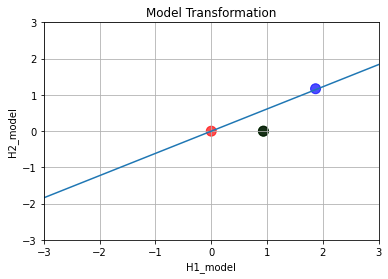

In [184]:
# Now let's see the Representational Space found and the last transformation:
matmul_result = tf.linalg.matmul(tf.constant(X,dtype='float32'), model.trainable_variables[0].numpy())
bias_added = tf.math.add(tf.broadcast_to(model.trainable_weights[1].numpy(),[4,2]),matmul_result)
max_out = tf.math.maximum(bias_added,0)
estimatef =tf.math.add(tf.broadcast_to(model.trainable_weights[3].numpy(),[4,1]), 
                       tf.linalg.matmul(max_out, model.trainable_weights[2].numpy()) )
estimatef

model_m = model.trainable_weights[2].numpy()[0] / -model.trainable_weights[2].numpy()[1] 
model_b = 0 # by definition

# plotting result
my_plot(max_out.numpy()[:,0],max_out.numpy()[:,1],
        my_x_lim,my_y_lim,"Model Transformation","H1_model","H2_model", line_flag = True, line_m = model_m,line_b= model_b,size=100)

## Manual BackProp to see The net working

In [185]:
# definition of the new model
new_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2,activation='relu', 
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1)),
                                    tf.keras.layers.Dense(1,activation='linear',
                                                          kernel_initializer= tf.keras.initializers.RandomNormal(mean=1.0,stddev=1,seed=1), 
                                                          bias_initializer= tf.keras.initializers.RandomNormal(seed=1))
])

In [186]:
# Let's use the same loss function (loss_fn)
# Let's define the optimizer

my_optimizer = tf.keras.optimizers.SGD()

In [187]:
# Now we define some objects

loss_history = []
first_layer_matrix_history = []
first_layer_bias_history = []
second_layer_weight_vector_history = []
second_layer_bias_history = []

In [195]:
def train_step(X_train,y_train):
  with tf.GradientTape() as tape:
    prediction = new_model(X_train)
    
    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(prediction.shape, (4, 1))
    
    loss_value = loss_fn(prediction, y_train)

  loss_history.append(loss_value.numpy())
  grads = tape.gradient(loss_value, new_model.trainable_variables)
  my_optimizer.apply_gradients(zip(grads, new_model.trainable_variables))
  return loss_value

In [193]:
def train(epochs):
  for epoch in range(epochs):
    loss = train_step(X,y)
    print ('Epoch {} finished with {} error value'.format(epoch,loss))


In [196]:
train(5)

ValueError: ignored

## REFERENCES: 

_About plotting_

[How to put color in scatter plot](https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib)

[How to set points' sizes and transparency](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)

[How to draw a line in scatter plot](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)

_About Neural Networks and their topology behaviour_


[Manifold Topology](https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/)

_How to keep track of weight values_

[Using tensorflow checkpoint](https://www.tensorflow.org/guide/checkpoint)

[TensorFlow Model Checkpoints - DOC](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)

[How to use checkpoints](https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6)

[Using model.save_weights](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save_weights)

_Initializing weights values_

[Random Normal](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/RandomNormal)

_It looks like I'll need to implement my own backprop_

[Intro to AutoDiff](https://www.tensorflow.org/guide/autodiff)

[Training a model](https://www.tensorflow.org/guide/eager#train_a_model)